In [1]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd
import os

In [4]:
import pandas as pd
df = pd.read_csv('sign_mnist_test.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [2]:
def get_data(filename):
    labels = []
    images = []
    with open(filename) as training_file:
        csv_reader = csv.reader(training_file, delimiter = ',')
        first_line = True
        temp_images = []
        temp_labels = []
        for row in csv_reader:
            if first_line:
                first_line = False
            else:
                temp_labels.append(row[0])
                image_data = row[1:785]
                image_data_as_array = np.array_split(image_data, 28)
                temp_images.append(image_data_as_array)
        images = np.array(temp_images).astype('float')
        labels = np.array(temp_labels).astype('float')
        
    return images, labels

path_sign_mnist_train = 'sign_mnist_train.csv'
path_sign_mnist_test = 'sign_mnist_test.csv'

training_images, training_labels = get_data(path_sign_mnist_train)
testing_images, testing_labels = get_data(path_sign_mnist_test)

print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)    

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [5]:
training_images = np.expand_dims(training_images, axis = 3)
testing_images = np.expand_dims(testing_images, axis = 3)

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

print(training_images.shape)
print(testing_images.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [7]:
from tensorflow.keras.optimizers import RMSprop

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape = (28,28,1)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
])

In [10]:
model.compile(optimizer = RMSprop(lr = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['acc'])

In [12]:
history = model.fit_generator(train_datagen.flow(training_images, training_labels, batch_size=32),
                             steps_per_epoch = len(training_images)/32,
                             epochs = 15,
                             validation_data = validation_datagen.flow(testing_images, testing_labels, batch_size=32),
                             validation_steps = len(testing_images)/32)

model.evaluate(testing_images, testing_labels)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 857.96875 steps, validate for 224.125 steps
Epoch 1/15
858/857 [==============================] - 134s 156ms/step - loss: 2.5686 - acc: 0.2168 - val_loss: 1.4281 - val_acc: 0.5371
Epoch 2/15
858/857 [==============================] - 114s 133ms/step - loss: 1.6703 - acc: 0.4647 - val_loss: 0.9728 - val_acc: 0.6559
Epoch 3/15
858/857 [==============================] - 101s 118ms/step - loss: 1.1747 - acc: 0.6141 - val_loss: 0.8642 - val_acc: 0.6992
Epoch 4/15
858/857 [==============================] - 102s 119ms/step - loss: 0.9053 - acc: 0.7023 - val_loss: 0.4583 - val_acc: 0.8246
Epoch 5/15
858/857 [==============================] - 113s 131ms/step - loss: 0.7260 - acc: 0.7590 - val_loss: 0.4665 - val_acc: 0.8433
Epoch 6/15
858/857 [==============================] - 109s 128ms/step - loss: 0.6176 - acc: 0.7966 - val_loss: 0.2728 - val_acc: 0.9048
Epoch 7/15
858/857 [==============================] - 108s 125ms/step - loss: 0.

[195.52530109177604, 0.7474902]

<Figure size 432x288 with 0 Axes>

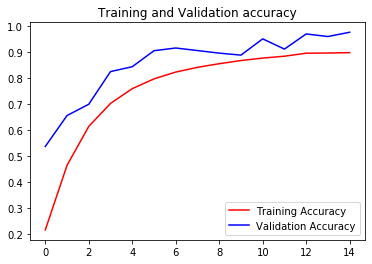

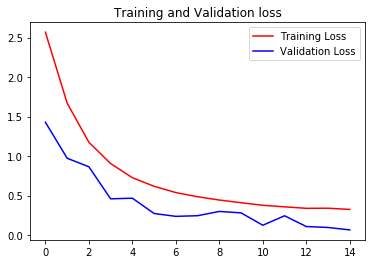

<Figure size 432x288 with 0 Axes>

In [14]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation loss')
plt.legend()
plt.figure()


